# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

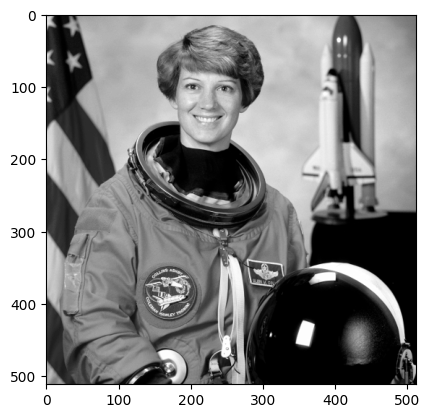

In [2]:
img=plt.imread('data/astronaut.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

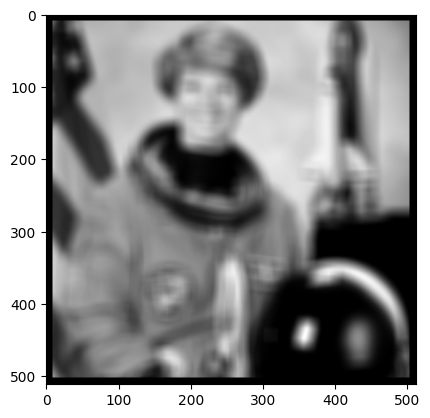

In [4]:
size=19
def meanfilter(img, size):
    result = numpy.zeros(img.shape)             #zu Beginn wird result definiert als Bild mit überall Nullen, um die ausgerechneten Werte des mean filters einzutragen für eine neues Bild
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):          #für jeden Pixel im Bild
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n <= img.shape[0]-1 and p[1]+n <= img.shape[1]-1:     # img.shape[0]-1 weil er ja bei 0 anfängt und deshalb nur bis Anzahl Reihen/Spalten minus 1 darf
            neighborhood_sum = 0                    #eine Variable mit dem Wert der Neeighborhood Summe wird erstellt, und in dieser Zeile damit immer auf null gesetzt?
            for q in numpy.ndindex(size, size):     #für jeden Pixel in der Neighborhood
                neighborhood_sum= img[p[0]-n+q[0],p[1]-n+q[1]] +neighborhood_sum
                   #Summe der Intensitäten, aber die neighborhood beginnt versetzt um n in x und y Richtung und nicht beim pixel. Für jedes Element aus der Neighborhood q wird die Summe erweitert
            avr=neighborhood_sum / (size*size)
            result[p] = avr
    # write your code here
    return result

#Erkenntnis: in der Zeile unter for q müssen wir mit der Lage von p arbeiten und über q iterieren, nicht zB img[q-n]
#Erkenntnis: x und y Koordinate getrennt betrachten
# result und alle anderen Variablen innerhalb der Definition der Funktion gibt es nur innerhalb der Funktion. Das heisst print(result) würde nicht funktionieren und ich kann auch immer result als Name verwenden
img1 = meanfilter(img,size)
plt.imshow(img1, 'grey')

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [8]:
help(median)
#testlist= list()
# testlist.append(5)
#stlist.append(25)
#testlist.append(10)
#median(testlist)


NameError: name 'median' is not defined

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

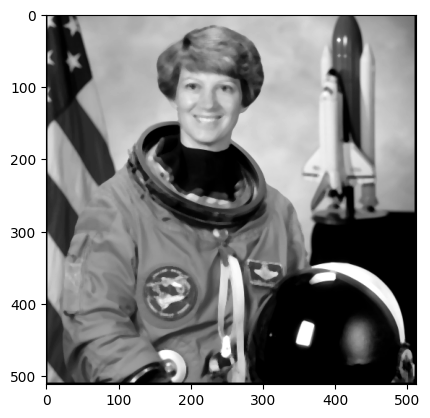

In [ ]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n <= img.shape[0]-1 and p[1]+n <= img.shape[1]-1:
            neighborhood_list = list()               #leere Liste
            for q in numpy.ndindex(size, size):     
                neighborhood_list.append(img[p[0]-n+q[0],p[1]-n+q[1]])     #einzeln Elemente aus der Neighborhood zu der Liste hinzufügen
            neighborhood_list.sort()                                       #Liste der Größe nach sortieren, damit das mittlere Element der Median ist
            median = neighborhood_list[(size**2)//2] #bei size 3 wäre es 9 durch 2 ist 4,5 wegen // gleich 4 und das 4te Element in der Liste ab 0 gezählt ist das 5te Element ab 1 gezählt, was genau der mittlere WErt ist. 
            result[p] = median    
    return result

#test mit size 5
img2 = medianfilter(img, 5)
plt.imshow(img2, 'grey')

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: